* Name: **Vu Truong Si**
* Github: **vutruong99**
* USC ID: **6031936649**

In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import math
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

**1. Decision Trees as Interpretable Models**

In [64]:
f
                           names=['Temperature of patient','Occurrence of nausea','Lumbar pain',
                                  'Urine pushing','Micturition pains','Burning of urethra','Inflammation of urinary bladder',
                                  'Nephritis of renal pelvis origin'], header=None)

In [65]:
diagnosis_df

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


In [66]:
# Convert Yes and No to 1 and 0 and String to Float.

diagnosis_df['Temperature of patient'] = diagnosis_df['Temperature of patient'].str.replace(",",".")
diagnosis_df['Temperature of patient'] = diagnosis_df['Temperature of patient'].astype(float)
diagnosis_df['Occurrence of nausea'] = diagnosis_df['Occurrence of nausea'].map({'yes': 1, 'no': 0})
diagnosis_df['Lumbar pain'] = diagnosis_df['Lumbar pain'].map({'yes': 1, 'no': 0})
diagnosis_df['Urine pushing'] = diagnosis_df['Urine pushing'].map({'yes': 1, 'no': 0})
diagnosis_df['Micturition pains'] = diagnosis_df['Micturition pains'].map({'yes': 1, 'no': 0})
diagnosis_df['Burning of urethra'] = diagnosis_df['Burning of urethra'].map({'yes': 1, 'no': 0})
diagnosis_df['Inflammation of urinary bladder'] = diagnosis_df['Inflammation of urinary bladder'].map({'yes': 1, 'no': 0})
diagnosis_df['Nephritis of renal pelvis origin'] = diagnosis_df['Nephritis of renal pelvis origin'].map({'yes': 1, 'no': 0})

In [67]:
# Select independent and dependent variables.

X = diagnosis_df[['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra']]
y = diagnosis_df[['Inflammation of urinary bladder','Nephritis of renal pelvis origin']]

**(b) Build a decision tree on the whole data set and plot it.**

In [68]:
# Build a decision tree classifer.

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X,y)

[Text(0.4, 0.9, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'Micturition pains <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'Urine pushing <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

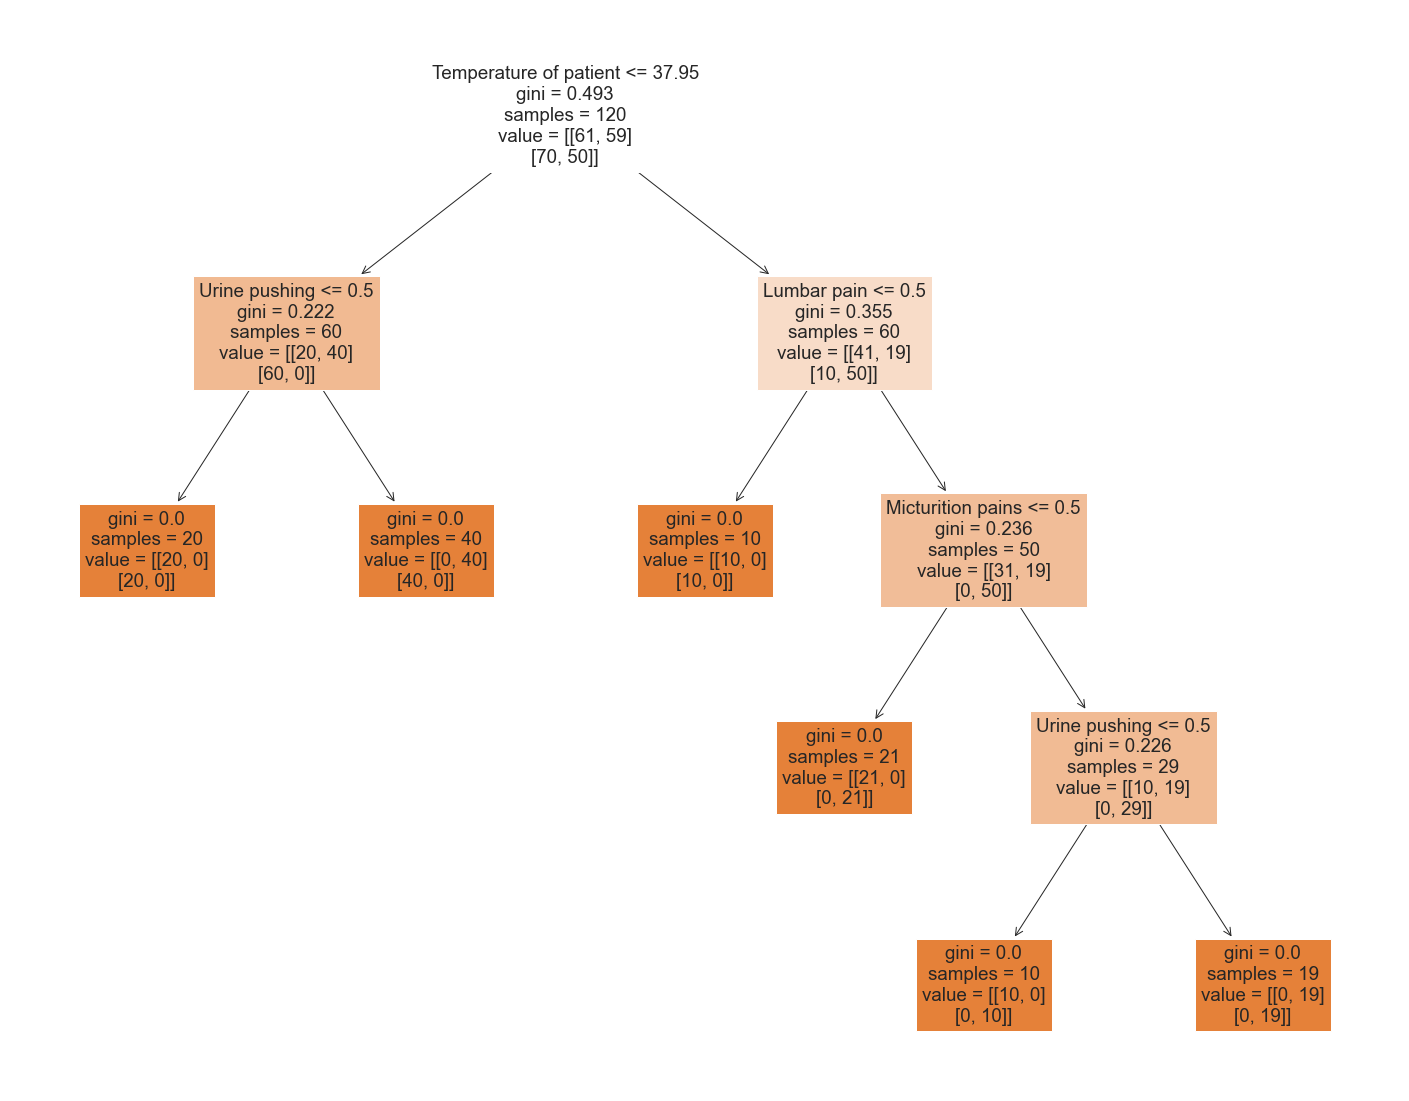

In [69]:
# Plot the tree.

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc, feature_names = diagnosis_df.columns, 
               class_names = ["Inflammation of urinary bladder", "Nephritis of renal pelvis origin"], filled = True)

In [70]:
# Code referenced from https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html.

def tree_to_code(tree, feature_names):

    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

**(c) Convert the decision rules into a set of IF-THEN rules.**

In [71]:
# Convert the decision tree into code.

tree_to_code(dtc, list(diagnosis_df.columns))

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing, Micturition pains, Burning of urethra, Inflammation of urinary bladder, Nephritis of renal pelvis origin):
  if Temperature of patient <= 37.95000076293945:
    if Urine pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Micturition pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition pains > 0.5
        if Urine pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


**(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.**

**Note** 

Since I saw various Piazza answers regarding the output of this question, I printed out 3 trees with 3 different alphas:
* Tree 1: Highest score, alpha = 0
* Tree 2: Second highest score, alpha != 0
* Tree 3: The smallest tree, alpha != 0

In [72]:
path = dtc.cost_complexity_pruning_path(X, y)
alphas = path["ccp_alphas"]
alphas

array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])

In [73]:
# Grid search to find the best alphas.

parameters = {'ccp_alpha': alphas}
grid = GridSearchCV(dtc, parameters, refit = True, verbose = 1) 
grid.fit(X, y) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.04908333, 0.07947222, 0.11111111, 0.20423611])},
             verbose=1)

In [74]:
grid.cv_results_ 

{'mean_fit_time': array([0.00399532, 0.00299621, 0.00318761, 0.0031889 , 0.00319419]),
 'std_fit_time': array([0.00089287, 0.00064153, 0.00040146, 0.00039516, 0.00040468]),
 'mean_score_time': array([0.00260134, 0.00199103, 0.0019949 , 0.00159745, 0.00199213]),
 'std_score_time': array([7.94959443e-04, 6.20345149e-04, 1.50316438e-05, 4.87301480e-04,
        6.02137910e-06]),
 'param_ccp_alpha': masked_array(data=[0.0, 0.04908333333333333, 0.07947222222222226,
                    0.1111111111111111, 0.204236111111111],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ccp_alpha': 0.0},
  {'ccp_alpha': 0.04908333333333333},
  {'ccp_alpha': 0.07947222222222226},
  {'ccp_alpha': 0.1111111111111111},
  {'ccp_alpha': 0.204236111111111}],
 'split0_test_score': array([1.        , 1.        , 1.        , 0.54166667, 0.54166667]),
 'split1_test_score': array([1.  , 1.  , 1.  , 0.75, 0.  ]),
 'split2_test_score': array([0.75 

In [75]:
# Best alpha. This tree is similar to the tree in 1.c.

print("Best alpha in general:", grid.best_params_["ccp_alpha"]) 

Best alpha in general: 0.0


In [76]:
# Best alpha that is not 0.0, so a pruned tree with the best score

print("Best alpha in that is not 0.0 (not the original tree):", alphas[1]) 

Best alpha in that is not 0.0 (not the original tree): 0.04908333333333333


In [77]:
# Refit the classifier with alpha = 0.04908333333333333.

dtc = DecisionTreeClassifier(ccp_alpha = 0.04908333333333333)
dtc.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.04908333333333333)

[Text(0.5, 0.8333333333333334, 'Temperature of patient <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.25, 0.5, 'Urine pushing <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.75, 0.5, 'Lumbar pain <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]')]

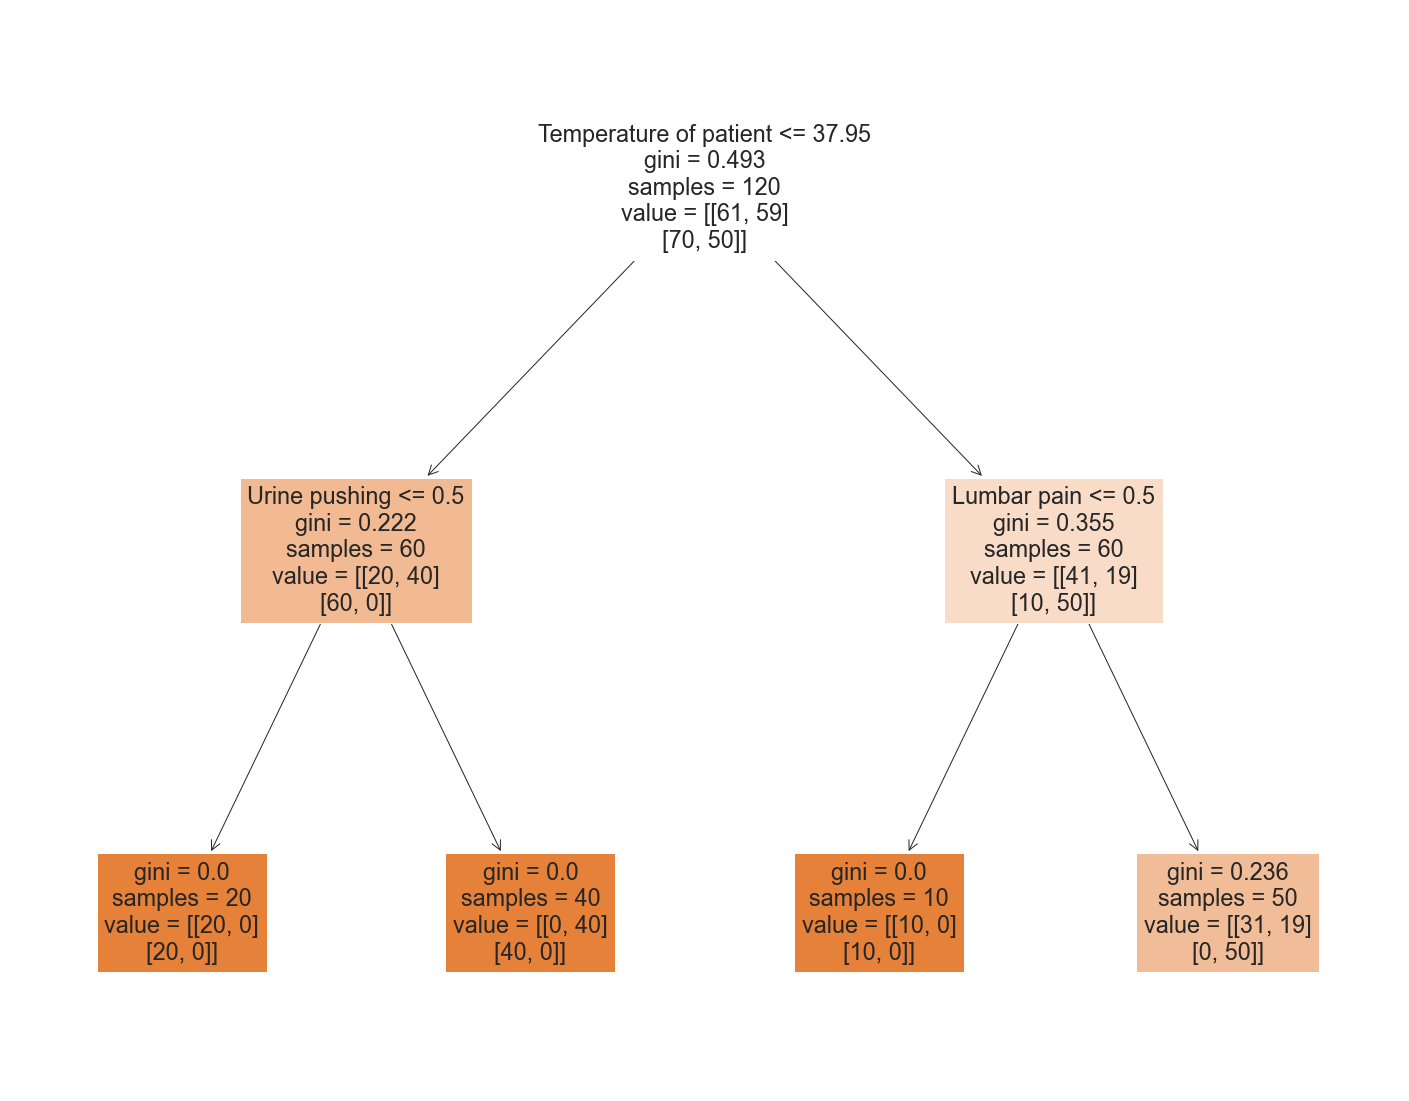

In [78]:
# Plot the tree.

fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtc, feature_names = diagnosis_df.columns, 
               class_names = ["Inflammation of urinary bladder", "Nephritis of renal pelvis origin"], filled = True)

In [79]:
# The tree with the least node is with alpha = 0.204236111111111.
# Refit the classifier with alpha = 0.204236111111111.

dtc = DecisionTreeClassifier(ccp_alpha = 0.204236111111111)
dtc.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.204236111111111)

[Text(0.5, 0.5, 'gini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]')]

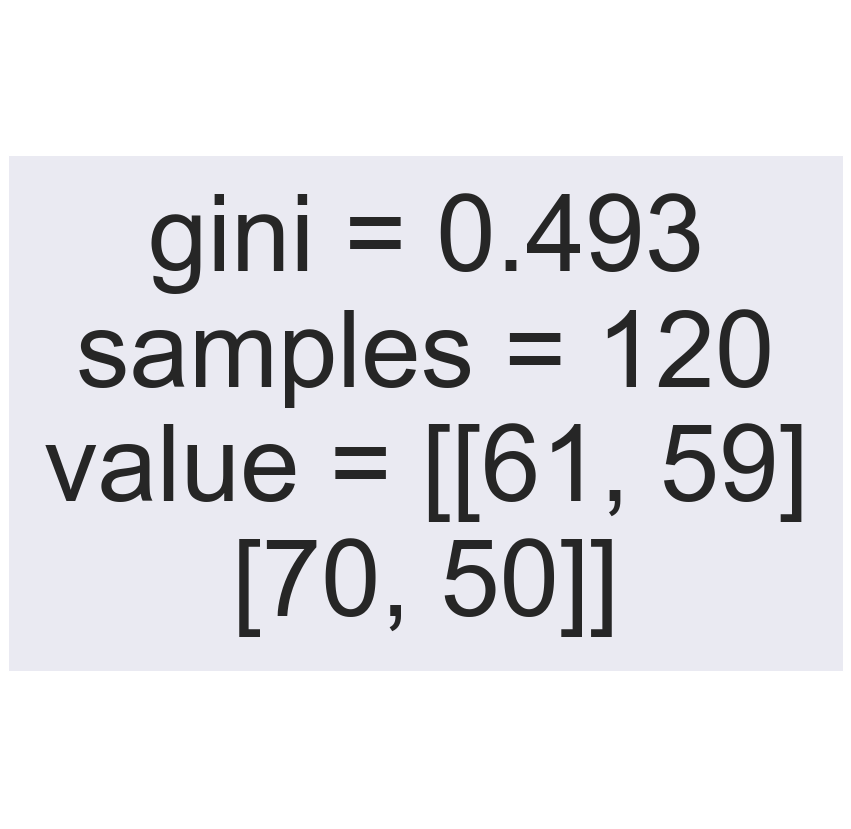

In [80]:
# Plot the most pruned tree.

tree.plot_tree(dtc)

**2. The LASSO and Boosting for Regression**

In [81]:
# Get the labels from the names file.

with open('../data/communities.names') as f:
    lines = f.readlines()
    
nextLine = False
i = 0
communities_labels = []
for line in lines:
    
    if nextLine == True:
        i = i + 1
        communities_labels.append(line.split(" ")[1].replace(":",""))
        if i == 128:
            break
    
    if line.startswith("Attribute Information: (122"):
        nextLine = True

In [82]:
communities_df = pd.read_csv('../data/communities.data', sep=',' , names = communities_labels, header=None)

In [83]:
# Replace ? with nan.

communities_df = communities_df.replace('?', np.nan)

In [84]:
communities_df

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [85]:
# Drop irrelevant features.

communities_df = communities_df.drop(columns = ["state", "county", "community", "communityname", "fold"], axis = 1)

In [86]:
# Split the data into training and test.

training_data = communities_df.iloc[:1495]
test_data = communities_df.iloc[1495:]

In [87]:
columns = training_data.columns

**(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.**

In [88]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [89]:
# Clean the whole dataset for visualization purpose, but clean training and set separately to prevent data leak.

communities_df = pd.DataFrame(imp_mean.fit_transform(communities_df), columns = columns)
training_data = pd.DataFrame(imp_mean.fit_transform(training_data), columns = columns)
test_data = pd.DataFrame(imp_mean.fit_transform(test_data), columns = columns)

In [90]:
communities_df

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.09
1990,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.45
1991,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
1992,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


**(c) Plot a correlation matrix for the features in the data set.**

In [91]:
communities_df.corr()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
population,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,...,0.713652,0.231897,0.270356,0.609147,0.595543,-0.061583,0.076527,0.466352,-0.035576,0.367157
householdsize,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,...,-0.015078,-0.004072,-0.051506,-0.032663,-0.007584,-0.006426,-0.000280,-0.094368,-0.054562,-0.034923
racepctblack,0.231178,-0.067109,1.000000,-0.794389,-0.106738,-0.066581,0.122338,0.153475,0.134068,0.052934,...,0.149758,0.095053,0.147023,0.122017,0.083179,-0.082660,0.010987,0.260793,0.022237,0.631264
racePctWhite,-0.300845,-0.235907,-0.794389,1.000000,-0.270266,-0.444166,-0.194015,-0.266852,-0.183804,0.136483,...,-0.131389,-0.337458,-0.215636,-0.109191,-0.114860,0.052940,-0.033209,-0.276234,-0.006323,-0.684770
racePctAsian,0.181603,0.201996,-0.106738,-0.270266,1.000000,0.266743,-0.025020,0.100727,0.052761,-0.272020,...,-0.001084,0.389944,0.296921,-0.017992,0.067745,0.032389,0.065424,0.101888,-0.011619,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LemasPctPolicOnPatr,-0.061583,-0.006426,-0.082660,0.052940,0.032389,0.024366,0.000652,0.013327,0.013687,0.005601,...,-0.067678,0.055734,0.023457,-0.115349,-0.089736,1.000000,0.007179,0.021153,-0.237240,-0.039002
LemasGangUnitDeploy,0.076527,-0.000280,0.010987,-0.033209,0.065424,0.025956,0.011271,0.005145,-0.001001,-0.042756,...,0.109830,-0.076634,-0.082946,0.078436,0.023349,0.007179,1.000000,-0.015712,-0.021100,0.055038
LemasPctOfficDrugUn,0.466352,-0.094368,0.260793,-0.276234,0.101888,0.125353,0.001301,0.117290,0.083180,-0.010168,...,0.299632,0.228084,0.206644,-0.052426,-0.062677,0.021153,-0.015712,1.000000,0.018649,0.348627
PolicBudgPerPop,-0.035576,-0.054562,0.022237,-0.006323,-0.011619,0.002234,-0.076589,-0.068575,-0.049876,0.076586,...,-0.113166,0.067199,0.080024,0.245532,0.259342,-0.237240,-0.021100,0.018649,1.000000,0.045466


<AxesSubplot:>

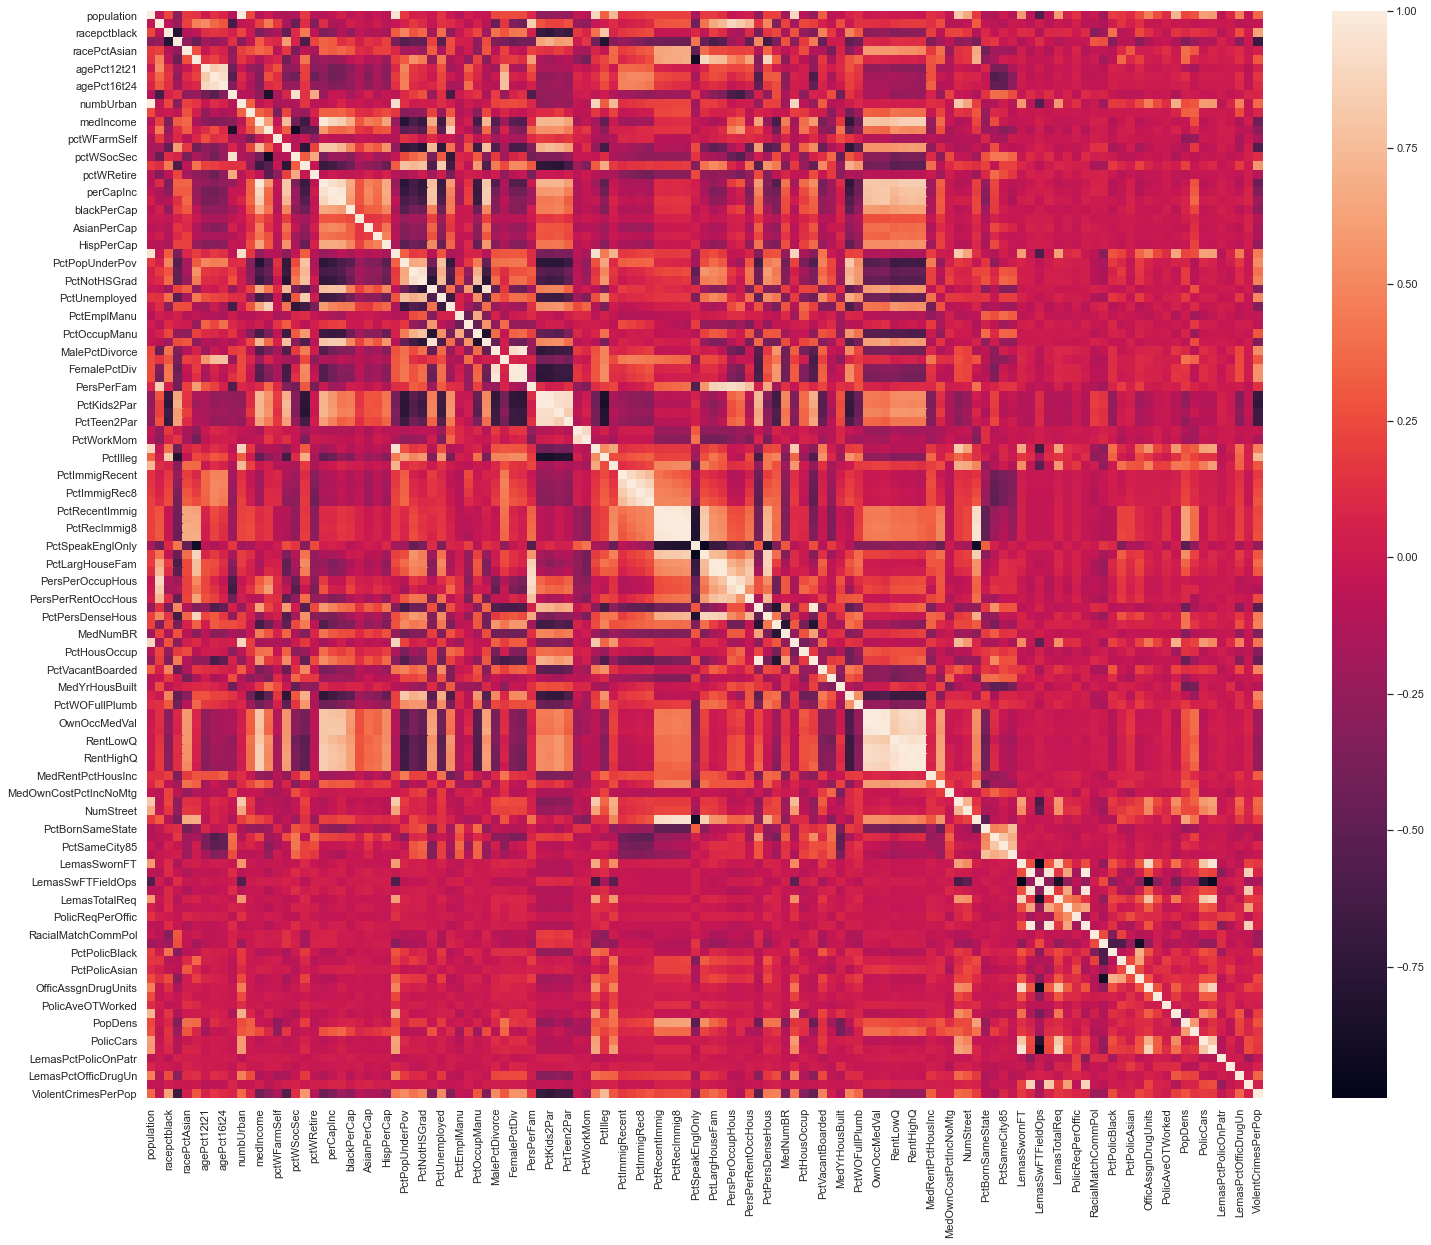

In [92]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(communities_df.corr())

**(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.**

In [93]:
# Calculate Coefficient of Variation for each feature and put them in a dictionary.

cv_dict = dict()

for column in communities_df.columns:
    try:
        sample_mean = communities_df[column].mean()
        sample_std = communities_df[column].std()
        cv = sample_std / sample_mean
        cv_dict[column] = cv
    except:
        continue

In [94]:
cv_dict

{'population': 2.203502536390972,
 'householdsize': 0.3532983018683109,
 'racepctblack': 1.4109203963756864,
 'racePctWhite': 0.3237815624993411,
 'racePctAsian': 1.3591621938222074,
 'racePctHisp': 1.614277791710685,
 'agePct12t21': 0.36583986883972397,
 'agePct12t29': 0.29069288841904145,
 'agePct16t24': 0.4951605143654288,
 'agePct65up': 0.42344170889026195,
 'numbUrban': 2.0017436381957676,
 'pctUrban': 0.6388488712113656,
 'medIncome': 0.5797533935755996,
 'pctWWage': 0.3277100586060616,
 'pctWFarmSelf': 0.7000301156104908,
 'pctWInvInc': 0.35923994722340613,
 'pctWSocSec': 0.36851263032540155,
 'pctWPubAsst': 0.699030504203365,
 'pctWRetire': 0.3496390828575848,
 'medFamInc': 0.527731885342079,
 'perCapInc': 0.545633428419145,
 'whitePerCap': 0.5075521907214038,
 'blackPerCap': 0.5894690036844645,
 'indianPerCap': 0.8096850868666168,
 'AsianPerCap': 0.6061938508790911,
 'OtherPerCap': 0.6706445725467309,
 'HispPerCap': 0.4739597186074789,
 'NumUnderPov': 2.304969714852185,
 'PctP

**(e) Pick sqrt(128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?**

In [95]:
top_11 = dict(sorted(cv_dict.items(), key=lambda x: x[1], reverse=True)[:int(math.sqrt(128))])

In [96]:
top_11.keys()

dict_keys(['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp'])

In [97]:
communities_df[top_11.keys()]

,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1989,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.03,0.02,0.01,0.16
1990,0.00,0.01,0.03,0.05,0.00,0.04,0.05,0.06,0.03,0.02,0.32
1991,0.02,0.06,0.13,0.06,0.91,0.12,0.16,0.17,0.21,0.08,0.25
1992,0.01,0.04,0.02,0.06,0.22,0.03,0.08,0.09,0.05,0.03,0.10


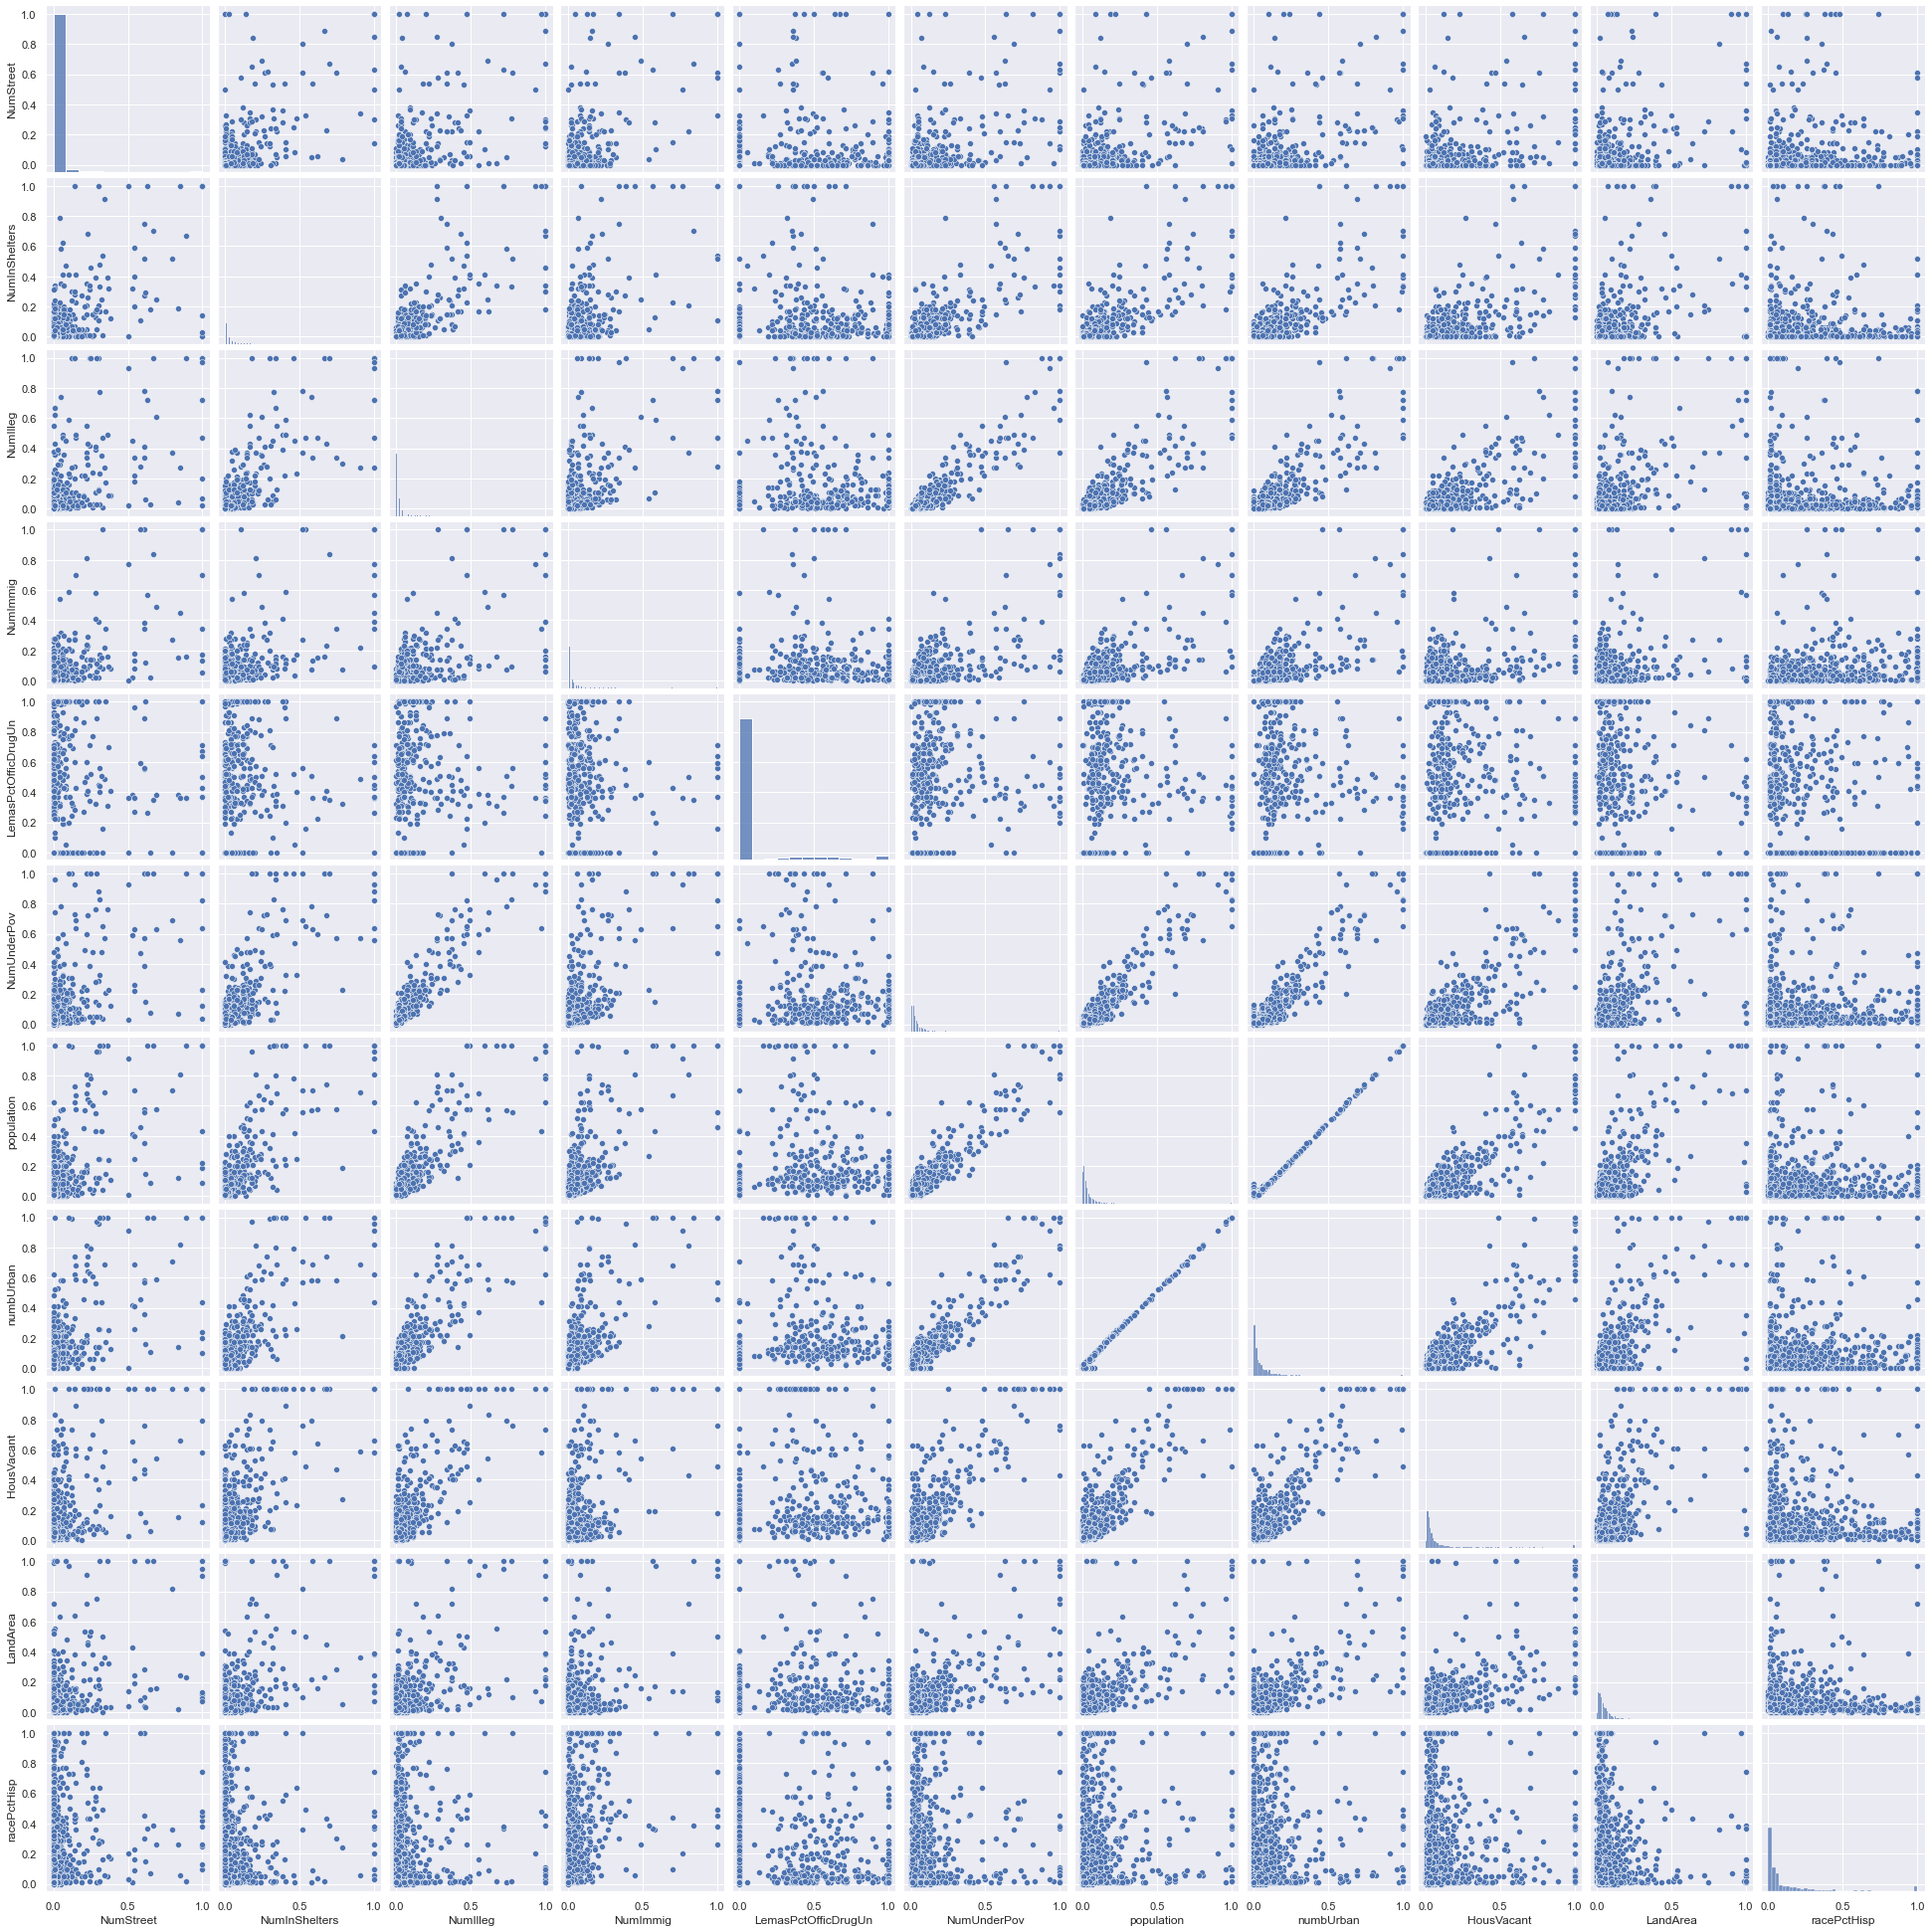

In [98]:
sns.pairplot(communities_df[top_11.keys()])

<AxesSubplot:>

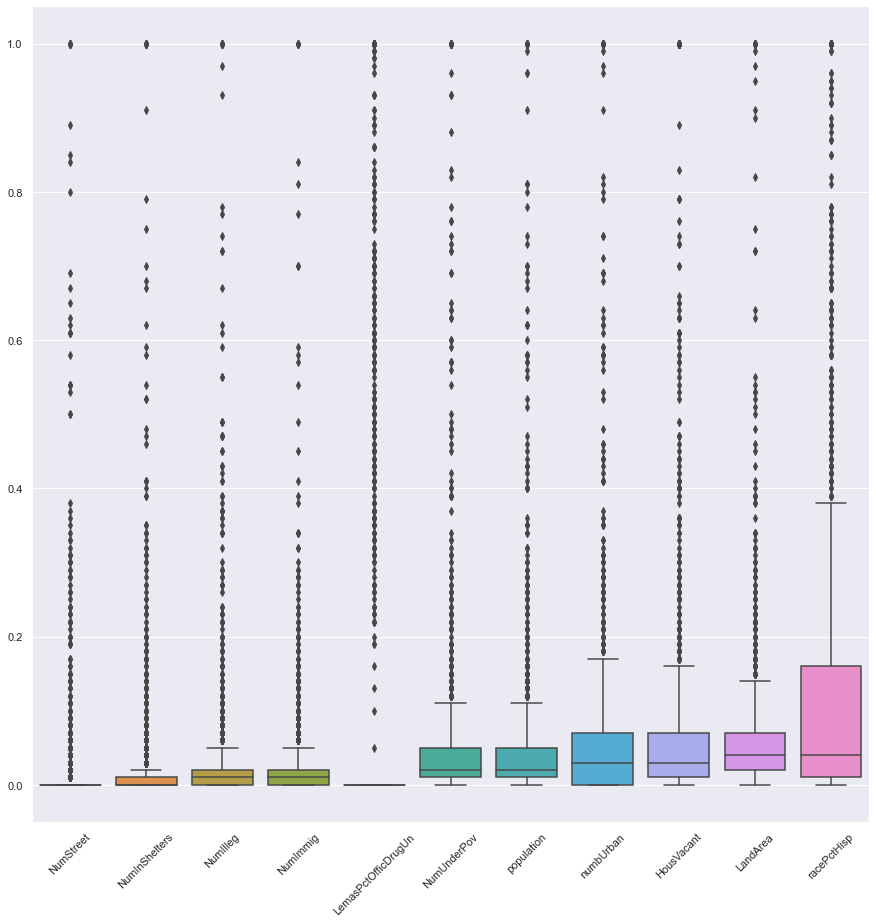

In [99]:
sns.set(rc={'figure.figsize':(15, 15)})
plt.xticks(rotation=45)
sns.boxplot(data = communities_df[top_11.keys()])

**Conclusion**

The 11 features extracted from the original set are significant based on the Coefficient of Variation score, but the scatter plots do not really tell us a lot about their importance with the response. Also, there are lots of outliers in these columns and there seems to be linear relationship between some of the features.

**(f) Fit a linear model using least squares to the training set and report the test error.**

In [100]:
# Create X and y sets. 

X_train = training_data.iloc[:,:122]
y_train = training_data["ViolentCrimesPerPop"]

X_test = test_data.iloc[:,:122]
y_test = test_data["ViolentCrimesPerPop"]

In [101]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print("Test error:", mean_squared_error(y_test, y_pred))

Test error: 0.018112462026533473


**(g) Fit a ridge regression model on the training set, with lambda chosen by cross-validation. Report the test error obtained.**

In [102]:
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
ridge = Ridge()
grid = GridSearchCV(ridge, parameters, refit = True, scoring = 'neg_mean_squared_error', verbose = 1) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                   1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [103]:
print("Best lambda:", grid.best_params_['alpha'])
y_pred = grid.predict(X_test)
print("Test error:", mean_squared_error(y_test, y_pred))

Best lambda: 1.0
Test error: 0.01772373712282779


**(h) Fit a LASSO model on the training set, with lambda chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized4 features. Report the test error for both cases and compare them.**

In [104]:
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
lasso = Lasso()
grid = GridSearchCV(lasso, parameters, refit = True,  scoring='neg_mean_squared_error', verbose = 1) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                   1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [105]:
print("Best lambda:", grid.best_params_['alpha'])
y_pred = grid.predict(X_test)
print("Test error:", mean_squared_error(y_test, y_pred))

Best lambda: 0.0001
Test error: 0.017766465555377833


In [106]:
# Variables that were selected by the model.

print("Number of variables selected:", len(list(columns[np.where(grid.best_estimator_.coef_ != 0)])))
print("The variables selected:", list(columns[np.where(grid.best_estimator_.coef_ != 0)]))

Number of variables selected: 78
The variables selected: ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctF

In [107]:
# LASSO with standardization.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [108]:
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
lasso = Lasso()
grid = GridSearchCV(lasso, parameters, refit = True,  scoring='neg_mean_squared_error', verbose = 3,n_jobs=-1) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                   1000]},
             scoring='neg_mean_squared_error', verbose=3)

In [109]:
print("Best lambda:", grid.best_params_['alpha'])
y_pred = grid.predict(X_test)
print("Test error:", mean_squared_error(y_test, y_pred))

Best lambda: 0.001
Test error: 0.0179550520850434


In [110]:
# Variables that were selected by the model.

print("Number of variables selected:", len(list(columns[np.where(grid.best_estimator_.coef_ != 0)])))
print("The variables selected:", list(columns[np.where(grid.best_estimator_.coef_ != 0)]))

Number of variables selected: 68
The variables selected: ['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'PolicReqPerOffic', 'RacialMatchCommPol', 'PctPolicBlack', 

**Comparison**

The test error after standardizing the features is a tiny bit bigger than that of the first model (0.017955052085043395 vs 0.017766465555377833). Also, the number of variables selected by the second model is 68 while that of the first model is 78.

**(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.**

In [111]:
parameters = {'pca__n_components': range(1,123)}
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
grid = GridSearchCV(pcr, parameters, refit = True,  scoring='neg_mean_squared_error', verbose = 1) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 122 candidates, totalling 610 fits


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=1)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'pca__n_components': range(1, 123)},
             scoring='neg_mean_squared_error', verbose=1)

In [112]:
print("Best M:", grid.best_params_['pca__n_components'])
y_pred = grid.predict(X_test)
print("Test error:", mean_squared_error(y_test, y_pred))

Best M: 95
Test error: 0.0186961266888081


**(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine (the regularization term) using cross-validation.**

In [113]:
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
xgb = XGBRegressor()
grid = GridSearchCV(xgb, parameters, refit = True,  scoring='neg_mean_squared_error', verbose = 1) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                   1000]},
             scoring='neg_mean_squared_error', verbose=1)

In [114]:
print("Best alpha:", grid.best_params_['alpha'])
y_pred = grid.predict(X_test)
print("Test error:", mean_squared_error(y_test, y_pred))

Best alpha: 1.0
Test error: 0.017529096849822564
